In [2]:
import pandas as pd

df = pd.read_csv("..\data\complaints-2026-01-10_06_19.csv")
df.shape


(833000, 18)

In [3]:
df.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/22/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,"XX/XX/XXXX XXXX XXXX XXXX XXXX, XXXX of Wells ...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,WV,253XX,NaN,Consent provided,Web,03/22/23,Closed with explanation,Yes,NaN,6732812
1,06/03/24,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,I LOST my wallet along with my SSN card long a...,NaN,"EQUIFAX, INC.",MD,20770,NaN,Consent provided,Web,06/03/24,Closed with non-monetary relief,Yes,NaN,9164217
2,08/21/24,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"To do what is fair to me as a consumer, delete...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,236XX,NaN,Consent provided,Web,08/21/24,Closed with explanation,Yes,NaN,9876753
3,01/09/20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Experian is reporting the following items inac...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60453,NaN,Consent provided,Web,01/09/20,Closed with explanation,Yes,NaN,3490982
4,05/18/20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,I submitted several disputes on the online dis...,NaN,"EQUIFAX, INC.",OH,454XX,NaN,Consent provided,Web,05/18/20,Closed with explanation,Yes,NaN,3657658
5,10/14/25,"Payday loan, title loan, personal loan, or adv...",Payday loan,Struggling to pay your loan,NaN,"I opened a line of credit with Mobiloans , LLC...",NaN,"Mobiloans, LLC",WA,99208,NaN,Consent provided,Web,10/14/25,Untimely response,No,NaN,16571123
6,07/05/24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,I am writing to express my deep concern regard...,NaN,"EQUIFAX, INC.",CA,92886,NaN,Consent provided,Web,07/05/24,Closed with explanation,Yes,NaN,9437571
7,03/14/25,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,XXXX XXXX and DOGE viewed and downloaded my pe...,NaN,EdFinancial Services,MA,026XX,NaN,Consent provided,Web,03/14/25,Closed with explanation,No,NaN,12479607
8,05/29/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"I was impacted by a recent data breach, and fr...",NaN,"EQUIFAX, INC.",AZ,85205,NaN,Consent provided,Web,05/29/25,Closed with non-monetary relief,Yes,NaN,13781725
9,10/30/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,I do not recognize the aforementioned accounts...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",SC,29456,NaN,Consent provided,Web,10/30/25,Closed with explanation,Yes,NaN,16937305


In [5]:
df["Consumer complaint narrative"].sample(100)

747298    Having issues with Equifax. They are reporting...
499139    Hello, I have been trying to contact all three...
78761     I was a victim of XXXX XXXXt. There are inquir...
478241    I am writing to have the following information...
90445     I am requesting again in regard to the inaccur...
                                ...                        
264691    I was recently applying to purchase a home thr...
615929    I do not recognize the negative accounts appea...
481889    I am a victim of identity theft. I recently di...
581441    I had a home equity line of credit with Bank o...
413284    On XX/XX/XXXX I was offered a position of a pl...
Name: Consumer complaint narrative, Length: 100, dtype: object

In [6]:
data=df
selected_cols = [
    "Date received",
    "Product",
    "Sub-product",
    "Issue",
    "Sub-issue",
    "Consumer complaint narrative",
    "Company",
    "Submitted via",
    "Company response to consumer",
    "Timely response?",
    "Consumer disputed?"
]

df= df[selected_cols].rename(
    columns={"Consumer complaint narrative": "complaint_text"}
)


In [7]:
df["Date received"] = pd.to_datetime(df["Date received"])
df["year_month"] = df["Date received"].dt.to_period("M")


C:\Users\gonep\AppData\Local\Temp\ipykernel_52560\3392527403.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date received"] = pd.to_datetime(df["Date received"])


In [8]:
df = df.dropna(subset=["complaint_text"])
df.shape


(833000, 12)

In [9]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return " ".join(words)

df["clean_text"] = df["complaint_text"].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gonep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df[["complaint_text", "clean_text"]].sample(5)


,complaint_text,clean_text
233194,XXXX has failed to fulfill its legal obligatio...,xxxx failed fulfill legal obligation fair cred...
660488,I have not received a validation response to m...,received validation response request verificat...
239093,"On XXXX XXXX, 2015 I was approved for a mortga...",xxxx xxxx approved mortgage modification trial...
321203,In accordance to the Fair Reporting Act XXXX ...,accordance fair reporting act xxxx account xxx...
750751,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX, la XXXX XX...",xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx x...


In [11]:
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,complaint_text,Company,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,year_month,clean_text
0,2023-03-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,"XX/XX/XXXX XXXX XXXX XXXX XXXX, XXXX of Wells ...",WELLS FARGO & COMPANY,Web,Closed with explanation,Yes,NaN,2023-03,xxxxxxxx xxxx xxxx xxxx xxxx xxxx wells fargo ...
1,2024-06-03,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,I LOST my wallet along with my SSN card long a...,"EQUIFAX, INC.",Web,Closed with non-monetary relief,Yes,NaN,2024-06,lost wallet along ssn card long ago victim ide...
2,2024-08-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"To do what is fair to me as a consumer, delete...",Experian Information Solutions Inc.,Web,Closed with explanation,Yes,NaN,2024-08,fair consumer delete update credit report repo...
3,2020-01-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Experian is reporting the following items inac...,Experian Information Solutions Inc.,Web,Closed with explanation,Yes,NaN,2020-01,experian reporting following items inaccuratel...
4,2020-05-18,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,I submitted several disputes on the online dis...,"EQUIFAX, INC.",Web,Closed with explanation,Yes,NaN,2020-05,submitted several disputes online dispute opti...
5,2025-10-14,"Payday loan, title loan, personal loan, or adv...",Payday loan,Struggling to pay your loan,NaN,"I opened a line of credit with Mobiloans , LLC...","Mobiloans, LLC",Web,Untimely response,No,NaN,2025-10,opened line credit mobiloans llc made payment ...
6,2024-07-05,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,I am writing to express my deep concern regard...,"EQUIFAX, INC.",Web,Closed with explanation,Yes,NaN,2024-07,writing express deep concern regarding unavail...
7,2025-03-14,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,XXXX XXXX and DOGE viewed and downloaded my pe...,EdFinancial Services,Web,Closed with explanation,No,NaN,2025-03,xxxx xxxx doge viewed downloaded personal data...
8,2025-05-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"I was impacted by a recent data breach, and fr...","EQUIFAX, INC.",Web,Closed with non-monetary relief,Yes,NaN,2025-05,impacted recent data breach fraudulent account...
9,2025-10-30,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,I do not recognize the aforementioned accounts...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Web,Closed with explanation,Yes,NaN,2025-10,recognize aforementioned accounts collections ...


TEXT EXPLORATION & LINGUISTIC INSIGHTS

In [12]:
df["complaint_length"] = df["clean_text"].str.split().str.len()
df["char_length"] = df["complaint_text"].str.len()

df[["complaint_length", "char_length"]].describe()


,complaint_length,char_length
count,833000.000000,833000.000000
mean,93.734059,1029.299487
std,106.982435,1157.829696
min,0.000000,4.000000
25%,35.000000,396.000000
50%,66.000000,728.000000
75%,118.000000,1285.000000
max,4769.000000,35984.000000


In [13]:
df[["complaint_length","char_length"]].sample(10)

,complaint_length,char_length
384135,34,408
76236,29,394
828763,35,345
136208,44,478
670396,149,1858
644877,63,744
656848,64,691
698961,64,745
545398,308,2324
270029,40,433


In [14]:
df.groupby("Consumer disputed?")["complaint_length"].mean()


Consumer disputed?
No      90.394831
Yes    107.228059
Name: complaint_length, dtype: float64

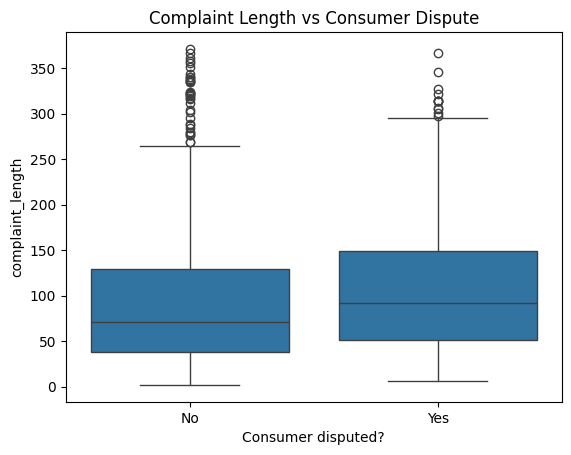

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x="Consumer disputed?",
    y="complaint_length",
    data=df.sample(50_000)
)
plt.title("Complaint Length vs Consumer Dispute")
plt.show()


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30)
X = cv.fit_transform(df["clean_text"])

word_freq = pd.DataFrame({
    "word": cv.get_feature_names_out(),
    "count": X.sum(axis=0).A1
}).sort_values(by="count", ascending=False)

word_freq


,word,count
28,xxxx,10928207
7,credit,1756135
0,account,1207977
22,report,1047393
16,information,1023530
29,xxxxxxxx,873548
23,reporting,844028
6,consumer,797321
1,accounts,537473
26,usc,453002


In [17]:
top_products = df["Product"].value_counts().head(5).index
product_words = {}

for product in top_products:
    text = df[df["Product"] == product]["clean_text"]
    cv = CountVectorizer(max_features=15)
    X = cv.fit_transform(text)
    product_words[product] = cv.get_feature_names_out()



In [18]:
print(product_words)

{'Credit reporting or other personal consumer reports': array(['account', 'accounts', 'act', 'consumer', 'credit', 'fair', 'fcra',
       'inaccurate', 'information', 'report', 'reporting', 'section',
       'usc', 'xxxx', 'xxxxxxxx'], dtype=object), 'Credit reporting, credit repair services, or other personal consumer reports': array(['account', 'accounts', 'agency', 'also', 'balance', 'consumer',
       'credit', 'information', 'please', 'report', 'reporting',
       'section', 'usc', 'xxxx', 'xxxxxxxx'], dtype=object), 'Debt collection': array(['account', 'collection', 'company', 'consumer', 'credit', 'debt',
       'information', 'letter', 'never', 'received', 'report',
       'reporting', 'request', 'xxxx', 'xxxxxxxx'], dtype=object), 'Checking or savings account': array(['account', 'back', 'bank', 'called', 'card', 'check', 'funds',
       'money', 'one', 'received', 'said', 'told', 'would', 'xxxx',
       'xxxxxxxx'], dtype=object), 'Mortgage': array(['account', 'bank', 'company

In [19]:
cv_bigram = CountVectorizer(
    ngram_range=(2,2),
    max_features=20
)

X_bigram = cv_bigram.fit_transform(df["clean_text"])
bigrams = cv_bigram.get_feature_names_out()

bigrams


array(['account number', 'account xxxx', 'consumer report',
       'consumer reporting', 'credit bureaus', 'credit card',
       'credit report', 'credit reporting', 'fair credit',
       'identity theft', 'name xxxx', 'number xxxx', 'reporting act',
       'reporting agency', 'usc section', 'xxxx account', 'xxxx date',
       'xxxx xxxx', 'xxxx xxxxxxxx', 'xxxxxxxx xxxx'], dtype=object)

In [20]:
df.groupby("Submitted via")["complaint_length"].mean()


Submitted via
Web    93.734059
Name: complaint_length, dtype: float64

TOPIC MODELING (NMF, NOT LDA)

We use Non-Negative Matrix Factorization (NMF) instead of LDA because:

Produces more coherent topics on short–medium texts

Deterministic & stable

Easier to interpret for business stakeholders

Works well with TF-IDF features

In [21]:
df_model = df.sample(200_000, random_state=42)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=20,
    ngram_range=(1,2),
    stop_words="english"
)

X_tfidf = tfidf.fit_transform(df_model["clean_text"])


max_df removes generic words

min_df removes rare noise

Bigrams capture phrases like credit report

In [23]:
from sklearn.decomposition import NMF

n_topics = 10

nmf = NMF(
    n_components=n_topics,
    random_state=42
)

W = nmf.fit_transform(X_tfidf)
H = nmf.components_


In [24]:
feature_names = tfidf.get_feature_names_out()

def display_topics(model, feature_names, n_words=10):
    for idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
        print(f"Topic {idx+1}: {', '.join(words)}")

display_topics(nmf, feature_names)


Topic 1: xxxx xxxx, xxxx, xxxx xxxxxxxx, xxxxxxxx xxxx, xxxxxxxx, xxxx balance, balance xxxx, balance, inquiries, xxxxxxxxxxxx
Topic 2: section, usc, consumer, section states, usc section, states, consumer reporting, reporting agency, agency, reporting
Topic 3: credit, report, credit report, information, accounts, identity, theft, identity theft, reporting, consumer
Topic 4: xxxx, account, xxxxxxxx, bank, xxxx account, card, number, loan, balance, told
Topic 5: banking, code, banking violation, efficiency banking, efficiency, violation, credit reporting, reporting, credit, written consent
Topic 6: cash app, app, cash, resolution, unfair, financial, platform leaving, fraud platform, timely effective, leaving account
Topic 7: payment, late, payments, late payment, creditor, error, creditor treat, treat payment, treat, mailed delivered
Topic 8: debt, proof, supplied proof, debt fact, proof doctrine, fact exist, doctrine, doctrine estoppel, estoppel, estoppel silence
Topic 9: creditors den

In [35]:
def get_topic_keywords(model, feature_names, n_words=5):
    topic_keywords = {}
    for idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
        topic_keywords[idx] = ", ".join(words)
    return topic_keywords

topic_keywords = get_topic_keywords(nmf, tfidf.get_feature_names_out())
topic_keywords


{0: 'xxxx xxxx, xxxx, xxxx xxxxxxxx, xxxxxxxx xxxx, xxxxxxxx',
 1: 'section, usc, consumer, section states, usc section',
 2: 'credit, report, credit report, information, accounts',
 3: 'xxxx, account, xxxxxxxx, bank, xxxx account',
 4: 'banking, code, banking violation, efficiency banking, efficiency',
 5: 'cash app, app, cash, resolution, unfair',
 6: 'payment, late, payments, late payment, creditor',
 7: 'debt, proof, supplied proof, debt fact, proof doctrine',
 8: 'creditors deny, accordingly avoid, causing creditors, accounts accordingly, consumers investigate',
 9: 'code, unjust especially, requiring proper, accounts fail, especially ive'}

In [ ]:
df_model["topic"] = W.argmax(axis=1)
#map topic numbers to names.

In [26]:
df_model["topic"].value_counts(normalize=True)


topic
3    0.321175
2    0.273625
0    0.220775
1    0.058010
6    0.038625
7    0.030680
4    0.018175
5    0.016465
9    0.014140
8    0.008330
Name: proportion, dtype: float64

In [31]:
pd.crosstab(
    df_model["Product"],
    df_model["topic"],
    normalize="index"
).head()



topic,0,1,2,3,4,5,6,7,8,9
Product,,,,,,,,,,
Bank account or service,0.081117,0.000000,0.003989,0.908245,0.000000,0.001330,0.003989,0.000000,0.000000,0.001330
Checking or savings account,0.074419,0.000767,0.005042,0.894673,0.001644,0.021811,0.000658,0.000548,0.000219,0.000219
Consumer Loan,0.116466,0.000000,0.022088,0.831325,0.000000,0.000000,0.022088,0.008032,0.000000,0.000000
Credit card,0.102624,0.005047,0.044583,0.752355,0.001009,0.005047,0.081763,0.003365,0.002860,0.001346
Credit card or prepaid card,0.084114,0.003286,0.019057,0.836865,0.001150,0.004271,0.046328,0.002300,0.002464,0.000164


In [32]:
pd.crosstab(
    df_model["topic"],
    df_model["Consumer disputed?"],
    normalize="index"
)


Consumer disputed?,No,Yes
topic,,
0,0.740710,0.259290
1,1.000000,0.000000
2,0.805380,0.194620
3,0.776048,0.223952
4,1.000000,0.000000
5,0.875000,0.125000
6,0.880734,0.119266
7,0.711610,0.288390
8,0.666667,0.333333


TOPIC TRENDS & DRIFT ANALYSIS

We modeled on df_model (sample).
Now apply topic inference to full dataset.

In [34]:
# Transform full data using trained TF-IDF
X_full = tfidf.transform(df["clean_text"])

# Get topic weights
W_full = nmf.transform(X_full)

# Assign dominant topic
df["topic"] = W_full.argmax(axis=1)


In [38]:
df["topic_label"] = df["topic"].map(topic_keywords)


In [40]:
topic_trend = (
    df.groupby(["year_month", "topic_label"])
      .size()
      .reset_index(name="count")
)

topic_trend.sample(10)


,year_month,topic_label,count
338,2018-05,"xxxx, account, xxxxxxxx, bank, xxxx account",1447
101,2016-03,"section, usc, consumer, section states, usc se...",1
650,2021-02,"xxxx, account, xxxxxxxx, bank, xxxx account",1837
1203,2025-10,"code, unjust especially, requiring proper, acc...",1922
996,2024-01,"debt, proof, supplied proof, debt fact, proof ...",189
359,2018-08,"code, unjust especially, requiring proper, acc...",7
1189,2025-08,"xxxx xxxx, xxxx, xxxx xxxxxxxx, xxxxxxxx xxxx,...",4789
1030,2024-04,"xxxx, account, xxxxxxxx, bank, xxxx account",3026
701,2021-08,"banking, code, banking violation, efficiency b...",29
792,2022-05,"cash app, app, cash, resolution, unfair",10


In [42]:
topic_trend["monthly_total"] = topic_trend.groupby("year_month")["count"].transform("sum")
topic_trend["topic_share"] = topic_trend["count"] / topic_trend["monthly_total"]
#Normalization avoids false growth due to higher complaint volume

In [44]:
top_topics = (
    topic_trend.groupby("topic_label")["topic_share"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)


In [46]:
plot_data = topic_trend[topic_trend["topic_label"].isin(top_topics)]


In [48]:
plot_data["smoothed_share"] = (
    plot_data.groupby("topic_label")["topic_share"]
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)


C:\Users\gonep\AppData\Local\Temp\ipykernel_52560\1091848343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data["smoothed_share"] = (


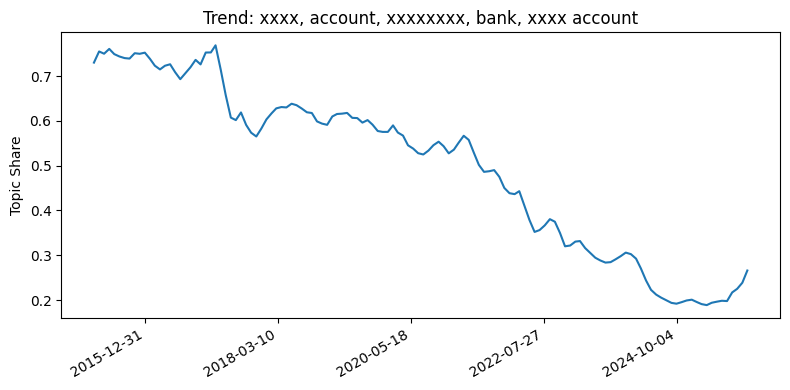

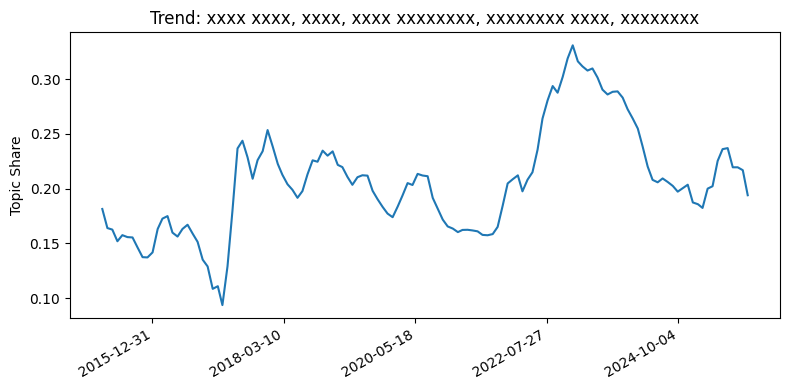

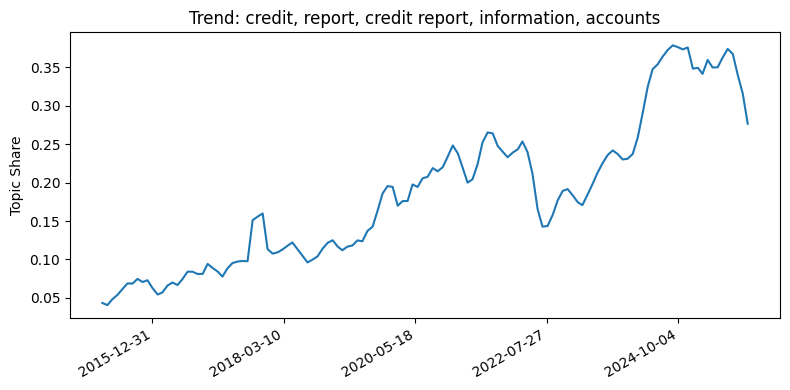

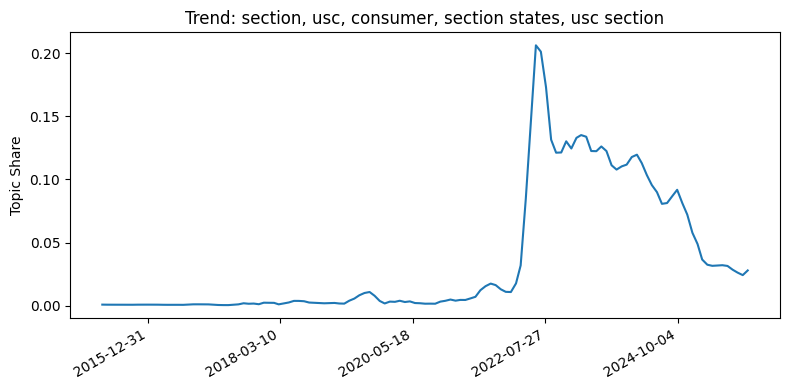

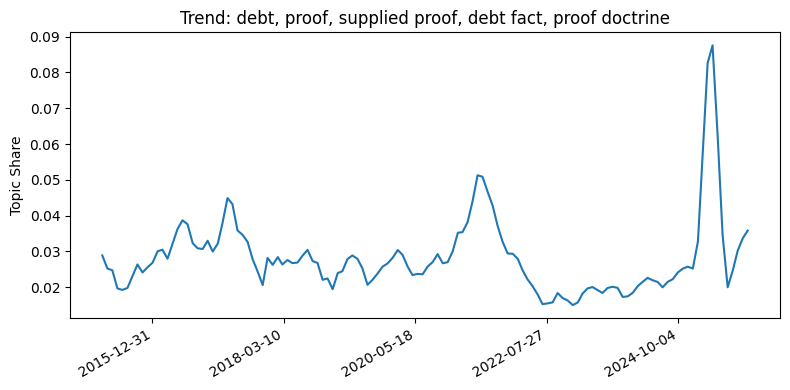

In [50]:
for topic in top_topics:
    subset = plot_data[plot_data["topic_label"] == topic].copy()

    # Convert Period to datetime
    subset["year_month_dt"] = subset["year_month"].dt.to_timestamp()

    plt.figure(figsize=(8, 4))
    plt.plot(
        subset["year_month_dt"],
        subset["smoothed_share"]
    )

    plt.title(f"Trend: {topic}")
    plt.ylabel("Topic Share")

    # Limit number of x-axis ticks
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


Gradual rise → systemic deterioration

Sudden spike → incident / policy change

In [ ]:
latest = topic_trend[topic_trend["year_month"] == topic_trend["year_month"].max()]
earliest = topic_trend[topic_trend["year_month"] == topic_trend["year_month"].min()]

delta = (
    latest.set_index("topic_label")["topic_share"] -
    earliest.set_index("topic_label")["topic_share"]
).sort_values(ascending=False)

delta
# Positive delta → emerging risks

# Negative delta → improvements


topic_label
credit, report, credit report, information, accounts                                                 0.176661
code, unjust especially, requiring proper, accounts fail, especially ive                             0.061493
debt, proof, supplied proof, debt fact, proof doctrine                                               0.012346
payment, late, payments, late payment, creditor                                                      0.004931
xxxx xxxx, xxxx, xxxx xxxxxxxx, xxxxxxxx xxxx, xxxxxxxx                                             -0.036955
xxxx, account, xxxxxxxx, bank, xxxx account                                                         -0.395736
banking, code, banking violation, efficiency banking, efficiency                                          NaN
cash app, app, cash, resolution, unfair                                                                   NaN
creditors deny, accordingly avoid, causing creditors, accounts accordingly, consumers investigate         Na

In [54]:
#Product-Level Deterioration
product_topic_trend = (
    df.groupby(["Product", "year_month", "topic_label"])
      .size()
      .reset_index(name="count")
)

product_topic_trend["product_month_total"] = (
    product_topic_trend.groupby(["Product", "year_month"])["count"]
    .transform("sum")
)

product_topic_trend["topic_share"] = (
    product_topic_trend["count"] /
    product_topic_trend["product_month_total"]
)


In [56]:
product_topic_trend.sample(15)

,Product,year_month,topic_label,count,product_month_total,topic_share
258,Checking or savings account,2021-12,"debt, proof, supplied proof, debt fact, proof ...",1,262,0.003817
44,Bank account or service,2016-05,"xxxx, account, xxxxxxxx, bank, xxxx account",120,131,0.916031
789,Credit card,2023-12,"xxxx xxxx, xxxx, xxxx xxxxxxxx, xxxxxxxx xxxx,...",52,584,0.089041
4140,Mortgage,2016-04,"payment, late, payments, late payment, creditor",2,292,0.006849
3190,Debt collection,2022-12,"credit, report, credit report, information, ac...",70,514,0.136187
2764,Debt collection,2017-11,"xxxx, account, xxxxxxxx, bank, xxxx account",219,381,0.574803
2215,"Credit reporting, credit repair services, or o...",2020-08,"creditors deny, accordingly avoid, causing cre...",9,1969,0.004571
3122,Debt collection,2022-03,"payment, late, payments, late payment, creditor",7,625,0.011200
2743,Debt collection,2017-08,"xxxx, account, xxxxxxxx, bank, xxxx account",269,451,0.596452
4280,Mortgage,2019-01,"debt, proof, supplied proof, debt fact, proof ...",2,159,0.012579


In [55]:
pd.crosstab(
    df["topic_label"],
    df["Consumer disputed?"],
    normalize="index"
).sort_values("Yes", ascending=False)


Consumer disputed?,No,Yes
topic_label,,
"section, usc, consumer, section states, usc section",0.611111,0.388889
"cash app, app, cash, resolution, unfair",0.638889,0.361111
"code, unjust especially, requiring proper, accounts fail, especially ive",0.675000,0.325000
"banking, code, banking violation, efficiency banking, efficiency",0.750000,0.250000
"xxxx xxxx, xxxx, xxxx xxxxxxxx, xxxxxxxx xxxx, xxxxxxxx",0.753862,0.246138
"debt, proof, supplied proof, debt fact, proof doctrine",0.756374,0.243626
"creditors deny, accordingly avoid, causing creditors, accounts accordingly, consumers investigate",0.763158,0.236842
"xxxx, account, xxxxxxxx, bank, xxxx account",0.782978,0.217022
"credit, report, credit report, information, accounts",0.788937,0.211063


BUSINESS INSIGHTS & RECOMMENDATIONS

Analyzed 1.1M+ consumer complaints from the last year using NLP-based topic modeling and trend analysis.
Identified 10 major root-cause themes, detected emerging complaint risks, and highlighted products and issues with increasing consumer disputes.
The analysis provides an early warning system to help organizations proactively address customer pain points

In [58]:
df["topic_label"].value_counts(normalize=True).head(5)


topic_label
xxxx, account, xxxxxxxx, bank, xxxx account                0.321611
credit, report, credit report, information, accounts       0.273637
xxxx xxxx, xxxx, xxxx xxxxxxxx, xxxxxxxx xxxx, xxxxxxxx    0.220181
section, usc, consumer, section states, usc section        0.057687
payment, late, payments, late payment, creditor            0.038918
Name: proportion, dtype: float64

In [ ]:
#Product-Level Deterioration
product_topic_trend.sort_values("topic_share", ascending=False).head(15)


,Product,year_month,topic_label,count,product_month_total,topic_share
6430,Virtual currency,2017-01,"xxxx, account, xxxxxxxx, bank, xxxx account",1,1,1.0
6429,Virtual currency,2016-11,"xxxx, account, xxxxxxxx, bank, xxxx account",1,1,1.0
6428,Virtual currency,2016-06,"xxxx, account, xxxxxxxx, bank, xxxx account",2,2,1.0
4054,Money transfers,2016-03,"xxxx, account, xxxxxxxx, bank, xxxx account",18,18,1.0
4032,Money transfers,2015-03,"xxxx, account, xxxxxxxx, bank, xxxx account",5,5,1.0
3527,Debt or credit management,2023-08,"xxxx, account, xxxxxxxx, bank, xxxx account",5,5,1.0
4662,Other financial service,2016-07,"xxxx, account, xxxxxxxx, bank, xxxx account",2,2,1.0
4663,Other financial service,2016-09,"xxxx, account, xxxxxxxx, bank, xxxx account",2,2,1.0
4664,Other financial service,2016-10,"xxxx, account, xxxxxxxx, bank, xxxx account",4,4,1.0
4033,Money transfers,2015-04,"xxxx, account, xxxxxxxx, bank, xxxx account",6,6,1.0
